<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/ARIMA_temperature_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot

In [0]:
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

In [0]:
series = read_csv(url, header= 0, index_col = 0)

In [4]:
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [5]:
print(series.head(20))


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0
1981-01-11  16.2
1981-01-12  13.3
1981-01-13  16.7
1981-01-14  21.5
1981-01-15  25.0
1981-01-16  20.7
1981-01-17  20.6
1981-01-18  24.8
1981-01-19  17.7
1981-01-20  15.5


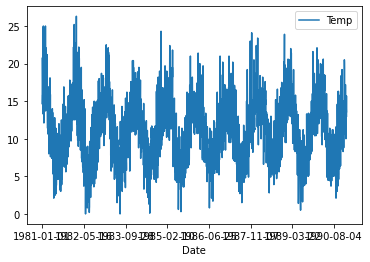

In [6]:
series.plot()
pyplot.show()

In [0]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]

In [8]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))


Dataset 3643, Validation 7


In [9]:
dataset

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-20,15.4
1990-12-21,13.1
1990-12-22,13.2


In [0]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [0]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [12]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
# seasonal difference
X = dataset.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3278
Model:                     ARMA(7, 1)   Log Likelihood               -8673.748
Method:                       css-mle   S.D. of innovations              3.411
Date:                Sat, 11 Apr 2020   AIC                          17367.497
Time:                        15:54:05   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.132      0.100      0.921      -0.246       0.273
ar.L1.y        1.1424      0.287      3.976      0.000       0.579       1.706
ar.L2.y       -0.4346      0.154     -2.829      0.0

In [0]:
forecast = model_fit.forecast()[0]

In [0]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [15]:
print('Forecast: %f' % forecast)

Forecast: 14.861668


In [0]:
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)


In [0]:

from pandas import datetime

forecast = model_fit.predict(start=start_index, end=end_index)


In [18]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861668


In [0]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

NameError: ignored

In [21]:
forecast_one_week_ahead = []
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1


Day 1: 14.861668
Day 2: 15.628783
Day 3: 13.331347
Day 4: 11.722411
Day 5: 10.421521
Day 6: 14.415546
Day 7: 12.674710


In [22]:
validation

,Temp
Date,
1990-12-25,12.9
1990-12-26,14.6
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [24]:
len(history)

3650

In [25]:
len(series)

3650

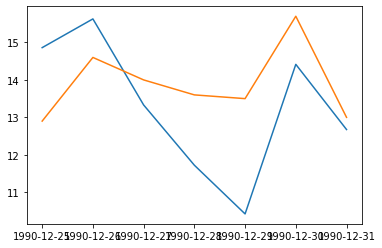

In [31]:
import matplotlib.pyplot as plt

plt.plot(history[-7:])
plt.plot(validation)

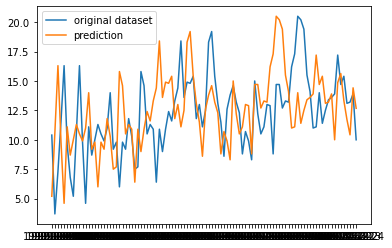

In [43]:
plt.plot(dataset.iloc[-100:], label = 'original dataset')
plt.plot(history[-100:], label = 'prediction')
plt.legend()

In [53]:
history[3640]

array([13.2])

In [54]:
dataset.iloc[3640]

Temp    13.2
Name: 1990-12-22, dtype: float64

In [0]:
import numpy as np
history_np = np.concatenate(history).ravel().tolist()

In [60]:
dataset.iloc[-12:-11]

,Temp
Date,
1990-12-13,11.4


In [0]:
history_np = np.array(history_np)

In [73]:
type(history_np)

numpy.ndarray

In [74]:
history_np[0]

20.7

In [0]:
dataset_np = np.array(dataset['Temp'])

In [81]:
dataset_np[0]

20.7

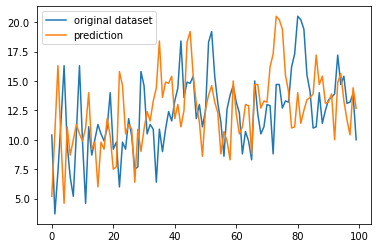

In [93]:
plt.plot(dataset_np[-100:], label = 'original dataset')
plt.plot(history_np[-100:], label = 'prediction')
plt.legend()

In [94]:
dataset_np[3000]

16.9

In [95]:
history_np[3000]

16.9